In [1]:
import numpy as np 
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/electric-motor-temperature/measures_v2.csv


![1](https://arabam-blog.mncdn.com/wp-content/uploads/2022/10/iStock-1497778396.jpg)

# Electric Motor Temperature Veri Seti İncelemesi

In [2]:
import numpy as np    #Sayısal hesaplamalar ve veri manipülasyonu için kullanılır.
                      #Diziler ve çok boyutlu dizilerle çalışmayı kolaylaştırır.
                      #Hızlı ve verimli vektör operasyonları ve çeşitli matematiksel fonksiyonlar sağlar.

import pandas as pd   #Veri okuma, temizleme, analiz etme ve işleme için kullanılır.


import seaborn as sns #İstatistiksel veri görselleştirmeleri yapar. Matplotlib üzerine kuruludur.
                      #Gelişmiş ve estetik grafikleri oluşturmanızı sağlar.
                      #Veri dağılımını, ilişkilerini ve kategorik verileri gösteren grafikler oluşturmak için kullanılır.

import matplotlib.pyplot as plt #Temel ve esnek veri görselleştirmeleri yapar.

In [3]:
df=pd.read_csv("/kaggle/input/electric-motor-temperature/measures_v2.csv") #Verisetinin okunması

# Veri Analizi

In [4]:
df.info() # Veriseti hakkında bilgi edinilmesi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330816 entries, 0 to 1330815
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   u_q             1330816 non-null  float64
 1   coolant         1330816 non-null  float64
 2   stator_winding  1330816 non-null  float64
 3   u_d             1330816 non-null  float64
 4   stator_tooth    1330816 non-null  float64
 5   motor_speed     1330816 non-null  float64
 6   i_d             1330816 non-null  float64
 7   i_q             1330816 non-null  float64
 8   pm              1330816 non-null  float64
 9   stator_yoke     1330816 non-null  float64
 10  ambient         1330816 non-null  float64
 11  torque          1330816 non-null  float64
 12  profile_id      1330816 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 132.0 MB


## Veriseti hakkında

*u_q :* Voltaj q-bileşeni ölçümü dq-koordinatlarında (V cinsinden) </br>
*coolant :* Soğutucu sıcaklığı (°C cinsinden) </br>
*stator_winding :* Stator sargı sıcaklığı (°C cinsinden) termokupllarla ölçülmüştür </br>
*u_d :* Voltaj d-bileşeni ölçümü dq-koordinatlarında </br>
*stator_tooth :* Stator diş sıcaklığı (°C cinsinden) termokupllarla ölçülmüştür </br>
*motor_speed :* Motor hızı (dev/dak cinsinden) </br>
*i_d :* Mevcut d-bileşeni ölçümü dq-koordinatlarında </br>
*i_q :* Mevcut q-bileşeni ölçümü dq-koordinatlarında </br>
*pm :* Kalıcı mıknatıs sıcaklığı (°C cinsinden) termokupllarla ölçülmüştür ve bir termografi ünitesi aracılığıyla kablosuz olarak iletilmiştir. </br>
*stator_yoke :* Stator boyunduruğu sıcaklığı (°C cinsinden) termokupllarla ölçülmüştür </br>
*ambient :* Ortam </br>
*torque :* Tork </br>
*profile_id :* Id </br>

In [5]:
# Verisetinde bulunan sütunların isimlendirilmesi
df.columns=["voltaj_q_bileseni","sogutma_suyu_sicakligi","stator_sargi_sicakligi","voltaj_d_bileseni","stator_dis_sicakligi","motor_hizi","mevcut_d_bileseni","mevcut_q_bileseni","miknatis_sicakligi","stator_boyundurugu_sicakligi","ortam","tork","Id"]

In [6]:
df.info() # Sütun isimleri güncellenmiş veriseti hakkında bilgi edinilmesi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330816 entries, 0 to 1330815
Data columns (total 13 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   voltaj_q_bileseni             1330816 non-null  float64
 1   sogutma_suyu_sicakligi        1330816 non-null  float64
 2   stator_sargi_sicakligi        1330816 non-null  float64
 3   voltaj_d_bileseni             1330816 non-null  float64
 4   stator_dis_sicakligi          1330816 non-null  float64
 5   motor_hizi                    1330816 non-null  float64
 6   mevcut_d_bileseni             1330816 non-null  float64
 7   mevcut_q_bileseni             1330816 non-null  float64
 8   miknatis_sicakligi            1330816 non-null  float64
 9   stator_boyundurugu_sicakligi  1330816 non-null  float64
 10  ortam                         1330816 non-null  float64
 11  tork                          1330816 non-null  float64
 12  Id                          

In [7]:
df.isnull().sum() # Null değer kontrolünün yapılması

voltaj_q_bileseni               0
sogutma_suyu_sicakligi          0
stator_sargi_sicakligi          0
voltaj_d_bileseni               0
stator_dis_sicakligi            0
motor_hizi                      0
mevcut_d_bileseni               0
mevcut_q_bileseni               0
miknatis_sicakligi              0
stator_boyundurugu_sicakligi    0
ortam                           0
tork                            0
Id                              0
dtype: int64

In [8]:
print(df.columns) #Verisetinde bulunan sütunların listelenmesi
print("Toplam Sütun sayısı: ",len(df.columns))

Index(['voltaj_q_bileseni', 'sogutma_suyu_sicakligi', 'stator_sargi_sicakligi',
       'voltaj_d_bileseni', 'stator_dis_sicakligi', 'motor_hizi',
       'mevcut_d_bileseni', 'mevcut_q_bileseni', 'miknatis_sicakligi',
       'stator_boyundurugu_sicakligi', 'ortam', 'tork', 'Id'],
      dtype='object')
Toplam Sütun sayısı:  13


In [9]:
df.describe() #Verisetinde bulunan verilerin standart sapma, ortalama vb. değerlerinin gösterilmesi

,voltaj_q_bileseni,sogutma_suyu_sicakligi,stator_sargi_sicakligi,voltaj_d_bileseni,stator_dis_sicakligi,motor_hizi,mevcut_d_bileseni,mevcut_q_bileseni,miknatis_sicakligi,stator_boyundurugu_sicakligi,ortam,tork,Id
count,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06
mean,5.427900e+01,3.622999e+01,6.634275e+01,-2.513381e+01,5.687858e+01,2.202081e+03,-6.871681e+01,3.741278e+01,5.850678e+01,4.818796e+01,2.456526e+01,3.110603e+01,4.079306e+01
std,4.417323e+01,2.178615e+01,2.867206e+01,6.309197e+01,2.295223e+01,1.859663e+03,6.493323e+01,9.218188e+01,1.900150e+01,1.999100e+01,1.929522e+00,7.713575e+01,2.504549e+01
min,-2.529093e+01,1.062375e+01,1.858582e+01,-1.315304e+02,1.813398e+01,-2.755491e+02,-2.780036e+02,-2.934268e+02,2.085696e+01,1.807669e+01,8.783478e+00,-2.464667e+02,2.000000e+00
25%,1.206992e+01,1.869814e+01,4.278796e+01,-7.869090e+01,3.841601e+01,3.171107e+02,-1.154061e+02,1.095863e+00,4.315158e+01,3.199033e+01,2.318480e+01,-1.374265e-01,1.700000e+01
50%,4.893818e+01,2.690014e+01,6.511013e+01,-7.429755e+00,5.603635e+01,1.999977e+03,-5.109376e+01,1.577401e+01,6.026629e+01,4.562551e+01,2.479733e+01,1.086035e+01,4.300000e+01
75%,9.003439e+01,4.985749e+01,8.814114e+01,1.470271e+00,7.558668e+01,3.760639e+03,-2.979688e+00,1.006121e+02,7.200837e+01,6.146083e+01,2.621702e+01,9.159718e+01,6.500000e+01
max,1.330370e+02,1.015985e+02,1.413629e+02,1.314698e+02,1.119464e+02,6.000015e+03,5.189670e-02,3.017079e+02,1.136066e+02,1.011480e+02,3.071420e+01,2.610057e+02,8.100000e+01


## NaN Değerlerin Eklenmesi

In [10]:
# Verisetinin boyutunun kopyalanması ve rastgele NaN değer eklenmesi için gerekli değişkenlerin tanımlanması
df_missing = df.copy()
df_size = df.size
missing_rate = 0.05
num_missing = int(df_size * missing_rate)

# Rastgele NaN değer ekleme
for _ in range(num_missing):
    row_idx = np.random.randint(0, df.shape[0])
    col_idx = np.random.randint(0, df.shape[1])
    df_missing.iat[row_idx, col_idx] = np.nan
    
df_missing.isnull().sum() # Eklenen Null değerlerin kontrolünün yapılması

voltaj_q_bileseni               65048
sogutma_suyu_sicakligi          64939
stator_sargi_sicakligi          65214
voltaj_d_bileseni               64684
stator_dis_sicakligi            64988
motor_hizi                      65217
mevcut_d_bileseni               65056
mevcut_q_bileseni               65182
miknatis_sicakligi              64614
stator_boyundurugu_sicakligi    64585
ortam                           64721
tork                            64817
Id                              64737
dtype: int64

## NaN değerler üzerinde Veri Ön İşleme

In [11]:
dataFrame=df_missing.dropna() #NaN değerlerinin bulunduğu verisetini NaN değerlerden temizledik

In [12]:
dataFrame.isnull().sum() # Yeni dataFrame'miz için null değer kontrolü yaptık

voltaj_q_bileseni               0
sogutma_suyu_sicakligi          0
stator_sargi_sicakligi          0
voltaj_d_bileseni               0
stator_dis_sicakligi            0
motor_hizi                      0
mevcut_d_bileseni               0
mevcut_q_bileseni               0
miknatis_sicakligi              0
stator_boyundurugu_sicakligi    0
ortam                           0
tork                            0
Id                              0
dtype: int64

# Veri Görselleştirme

In [13]:
# Veri görselleştirmek için gerekli kütüphanelerin projeye eklenmesi
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

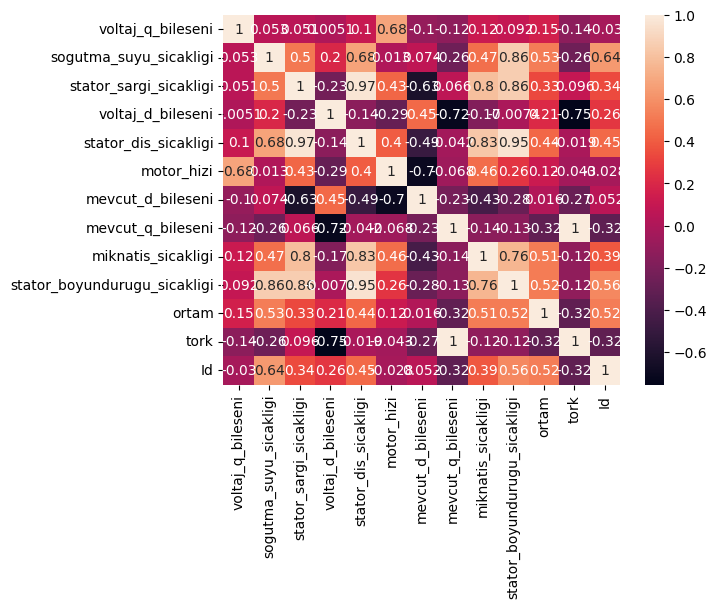

In [14]:
# Korelasyon (Veri ilişkisi) hakkında görselleştirme yapılması
sns.heatmap(data=dataFrame.corr(),annot=True)

In [15]:
# Dataframe korelasyonlarının tablo halinde gösterilmesi
dataFrame.corr()

,voltaj_q_bileseni,sogutma_suyu_sicakligi,stator_sargi_sicakligi,voltaj_d_bileseni,stator_dis_sicakligi,motor_hizi,mevcut_d_bileseni,mevcut_q_bileseni,miknatis_sicakligi,stator_boyundurugu_sicakligi,ortam,tork,Id
voltaj_q_bileseni,1.000000,0.052769,0.051054,0.005092,0.104924,0.683198,-0.100247,-0.124481,0.122188,0.091748,0.150574,-0.136123,-0.030314
sogutma_suyu_sicakligi,0.052769,1.000000,0.504943,0.196542,0.675017,0.012916,0.073753,-0.256996,0.467370,0.860798,0.525842,-0.258589,0.636056
stator_sargi_sicakligi,0.051054,0.504943,1.000000,-0.234843,0.970161,0.432992,-0.625392,0.065674,0.796275,0.860319,0.332994,0.095568,0.341055
voltaj_d_bileseni,0.005092,0.196542,-0.234843,1.000000,-0.142360,-0.288465,0.448677,-0.723308,-0.171679,-0.007357,0.205414,-0.754042,0.262926
stator_dis_sicakligi,0.104924,0.675017,0.970161,-0.142360,1.000000,0.399454,-0.488261,-0.042402,0.832411,0.953111,0.443381,-0.018517,0.451300
motor_hizi,0.683198,0.012916,0.432992,-0.288465,0.399454,1.000000,-0.700901,-0.068309,0.459243,0.256923,0.118453,-0.043336,-0.027854
mevcut_d_bileseni,-0.100247,0.073753,-0.625392,0.448677,-0.488261,-0.700901,1.000000,-0.231893,-0.428476,-0.279331,0.016190,-0.274638,0.052488
mevcut_q_bileseni,-0.124481,-0.256996,0.065674,-0.723308,-0.042402,-0.068309,-0.231893,1.000000,-0.142180,-0.131868,-0.315442,0.996460,-0.324095
miknatis_sicakligi,0.122188,0.467370,0.796275,-0.171679,0.832411,0.459243,-0.428476,-0.142180,1.000000,0.756978,0.513855,-0.116867,0.386655
stator_boyundurugu_sicakligi,0.091748,0.860798,0.860319,-0.007357,0.953111,0.256923,-0.279331,-0.131868,0.756978,1.000000,0.520367,-0.117515,0.563914


# **Bulgular** </br>

* Güçlü Pozitif İlişkiler: </br> </br>
stator_sargi_sicakligi ve stator_dis_sicakligi: Korelasyon değeri 0.970. Bu, iki değişkenin çok güçlü bir şekilde pozitif ilişkili olduğunu gösterir. Yani, birinin artması diğerinin de artmasına yol açıyor. </br>

stator_boyundurugu_sicakligi ve sogutma_suyu_sicakligi: Korelasyon değeri 0.860. Bu, iki değişken arasında güçlü bir pozitif ilişki olduğunu gösteriyor. </br>

miknatis_sicakligi ve stator_boyundurugu_sicakligi: Korelasyon değeri 0.756. Bu da önemli bir pozitif ilişkiyi işaret eder. </br>

stator_boyundurugu_sicakligi ve ortam: Korelasyon değeri 0.520. Bu da orta seviyede bir pozitif ilişki olduğunu gösteriyor. </br>

mevcut_q_bileseni ve tork: Korelasyon değeri 0.996. Bu iki değişken arasında çok güçlü bir pozitif ilişki vardır; birinin değeri arttıkça diğeri de artıyor. </br>

miknatis_sicakligi ve ortam: Korelasyon değeri 0.513. Bu, orta derecede pozitif bir ilişkiyi gösteriyor. </br>

voltaj_q_bileseni ve motor_hizi: Korelasyon değeri 0.683. Bu, orta güçlü bir pozitif ilişki olduğunu işaret eder. </br> </br> </br> 

* Güçlü Negatif İlişkiler: </br> </br>
voltaj_d_bileseni ve mevcut_q_bileseni: Korelasyon değeri -0.723. Bu, güçlü bir negatif ilişkiyi işaret eder; birinin artması, diğerinin azalmasına neden olabilir. </br>

voltaj_d_bileseni ve tork: Korelasyon değeri -0.754. Bu da çok güçlü bir negatif ilişkiyi gösterir; voltajın artması torku azaltabilir. </br>

motor_hizi ve mevcut_d_bileseni: Korelasyon değeri -0.701. Bu da güçlü bir negatif ilişkiyi işaret eder. </br>

mevcut_q_bileseni ve mevcut_d_bileseni: Korelasyon değeri -0.426. Orta düzeyde bir negatif ilişki var; birinin artması diğerinin azalmasına yol açabilir.</br>
</br> </br> </br>

* Sonuç: </br>
Çok güçlü pozitif ilişkiler: mevcut_q_bileseni ile tork arasındaki ilişki ve stator_sargi_sicakligi ile stator_dis_sicakligi arasındaki ilişki. </br>
Çok güçlü negatif ilişkiler: voltaj_d_bileseni ile tork arasındaki ilişki ve voltaj_d_bileseni ile mevcut_q_bileseni arasındaki ilişki. </br>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Stator Sargı Sıcaklığı Dağılımı')

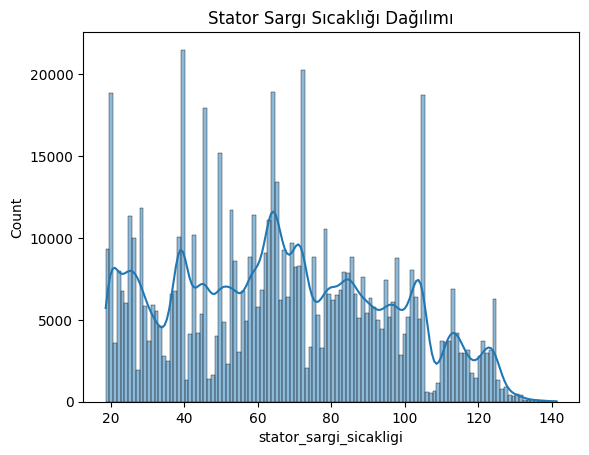

In [16]:
#Stator Sargı Sıcaklığı Dağılım Grafiği

sns.histplot(dataFrame['stator_sargi_sicakligi'], kde=True)
plt.title('Stator Sargı Sıcaklığı Dağılımı')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


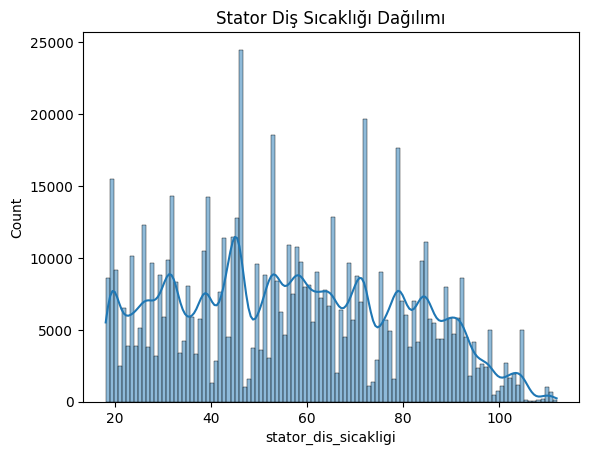

In [17]:
#Stator Diş Sıcaklığı Dağılım Grafiği
sns.histplot(dataFrame['stator_dis_sicakligi'], kde=True)
plt.title('Stator Diş Sıcaklığı Dağılımı')
plt.show()

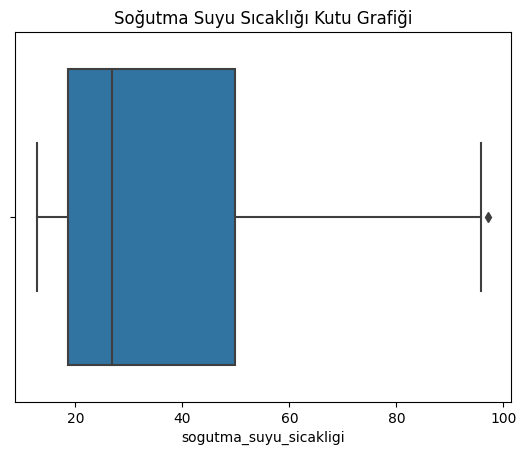

In [18]:
# Soğutma suyu sıcaklığı
sns.boxplot(x='sogutma_suyu_sicakligi', data=dataFrame)
plt.title('Soğutma Suyu Sıcaklığı Kutu Grafiği')
plt.show()

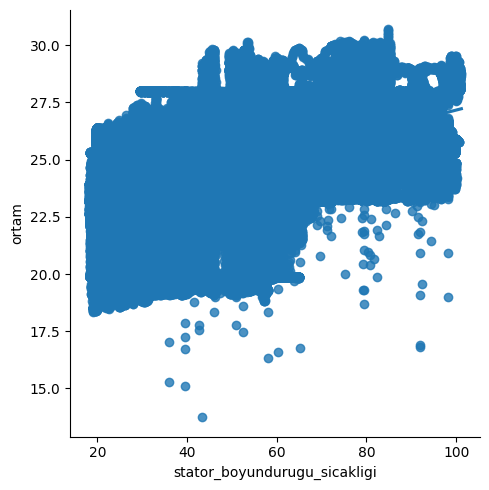

In [19]:
# Stator boyunduruğu sıcaklığı ile ortam arasında ki ilişki
sns.lmplot(x='stator_boyundurugu_sicakligi', y='ortam', data=dataFrame)

Text(0, 0.5, 'Mevcut\xa0Q\xa0Bileşeni')

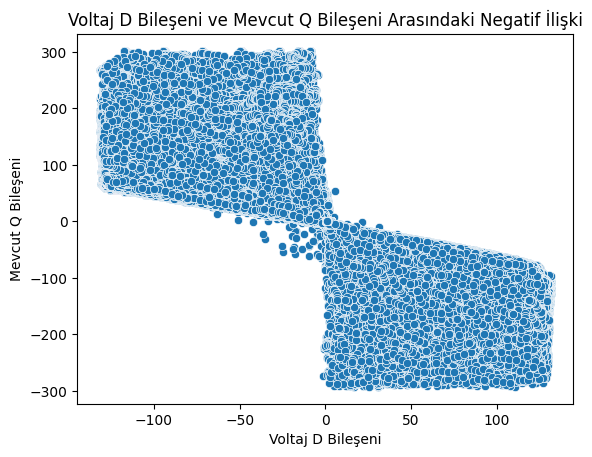

In [20]:
#Voltaj D Bileşeni ve Mevcut Q Bileşeni Arasındaki Negatif İlişki
sns.scatterplot(x='voltaj_d_bileseni', y='mevcut_q_bileseni', data=dataFrame)

# Grafik başlıkları
plt.title('Voltaj D Bileşeni ve Mevcut Q Bileşeni Arasındaki Negatif İlişki')
plt.xlabel('Voltaj D Bileşeni')
plt.ylabel('Mevcut Q Bileşeni')

Motor Hızı ile Tork Arasındaki Korelasyon: -0.04333646928959179


Text(0, 0.5, 'Tork')

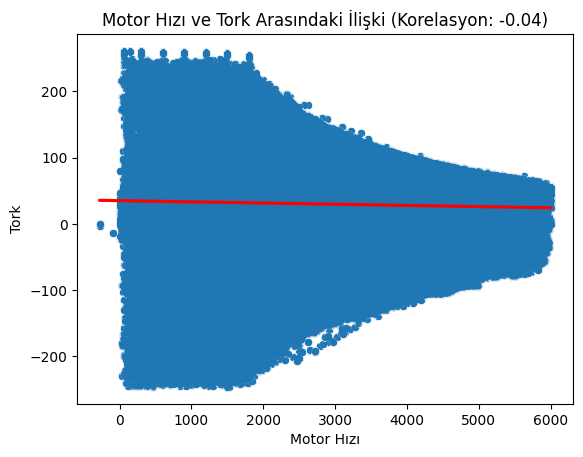

In [21]:
# Motor Hızı ile Tork arasında ki ilişki

# Korelasyon hesaplama
corr_motor_tork = dataFrame['motor_hizi'].corr(dataFrame['tork'])
print(f"Motor Hızı ile Tork Arasındaki Korelasyon: {corr_motor_tork}")

# Korelasyon değeriyle birlikte görselleştirme

# Scatter plot ile görselleştirme
sns.scatterplot(x='motor_hizi', y='tork', data=dataFrame)

# Regresyon çizgisi 
sns.regplot(x='motor_hizi', y='tork', data=dataFrame, scatter_kws={'s': 10}, line_kws={'color': 'red'})

plt.title(f'Motor Hızı ve Tork Arasındaki İlişki (Korelasyon: {corr_motor_tork:.2f})')
plt.xlabel('Motor Hızı')
plt.ylabel('Tork')